In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from models.base_model import SIRModelWrapper
checkpoint = r"tb_logs\EpidemiologyModule\SIRModelWrapper\CCP\version_0\checkpoints\epoch=99-step=6400.ckpt"
model = SIRModelWrapper.load_from_checkpoint(checkpoint)

In [19]:
from torchmetrics import MultioutputWrapper, R2Score, MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError 
r2 = MultioutputWrapper(R2Score(), num_outputs=3)
mae = MultioutputWrapper(MeanAbsoluteError(), num_outputs=3)
mape = MultioutputWrapper(MeanAbsolutePercentageError(), num_outputs=3)
mse = MultioutputWrapper(MeanSquaredError(), num_outputs=3)

In [26]:
N = 100
lag_size = 3
s0, i0, r0 = 0., 0.7, 0.3

R2: [tensor(0.), tensor(0.9410), tensor(0.9743)]
MAE: [tensor(0.0233), tensor(0.0174), tensor(0.0092)]
MAPE: [tensor(19885.4062), tensor(0.0300), tensor(0.0190)]
MSE: [tensor(0.0005), tensor(0.0004), tensor(0.0002)]


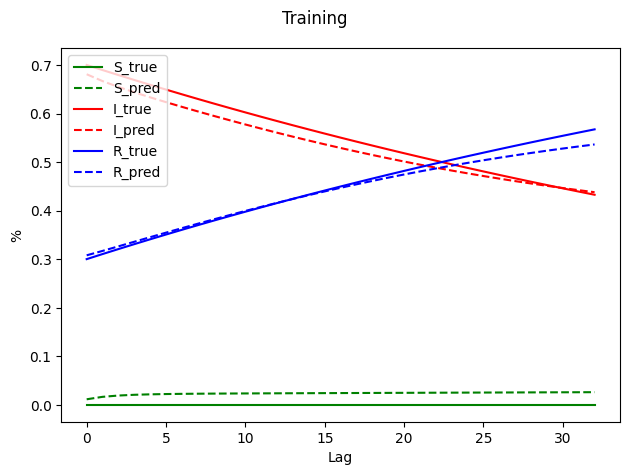

In [27]:
import matplotlib.pyplot as plt
from data.epidemiology import generate_sir_from_state
import torch
beta = 0.07
gamma = 0.005
y = generate_sir_from_state(s0, i0, r0, beta, gamma, N, lag_size)
preds = model.generate_sequence(N//lag_size, torch.Tensor([s0, i0, r0]), beta, gamma)

# Metrics
print("R2:", r2(preds, y))
print("MAE:", mae(preds, y))
print("MAPE:", mape(preds, y))
print("MSE:", mse(preds, y))

# Plot
fig, ax = plt.subplots()
ax.plot(y[:,0], color="green", label="S_true")
ax.plot(preds[:,0], color="green", linestyle="--", label="S_pred")
ax.plot(y[:,1], color="red", label="I_true")
ax.plot(preds[:,1], color="red", linestyle="--", label="I_pred")
ax.plot(y[:,2], color="blue", label="R_true")
ax.plot(preds[:,2], color="blue", linestyle="--", label="R_pred")
ax.legend()
ax.set_ylabel("%")
ax.set_xlabel("Lag")
fig.suptitle("Training")
fig.tight_layout()

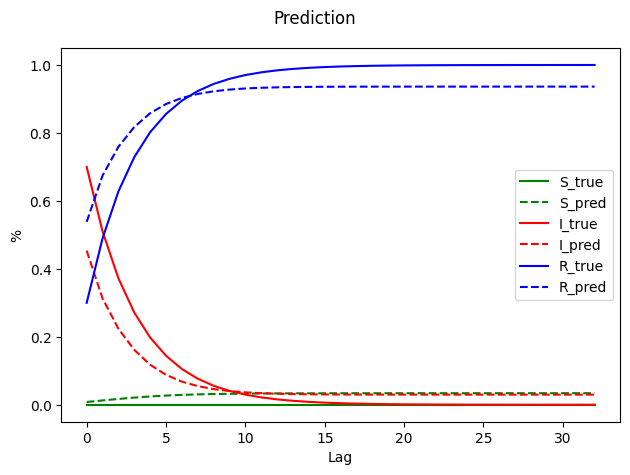

In [28]:
beta = 0.5
gamma = 0.1
y = generate_sir_from_state(s0, i0, r0, beta, gamma, N, lag_size)
preds = model.generate_sequence(N//lag_size, torch.Tensor([s0, i0, r0]), beta, gamma)
y_target = y
y_preds = preds.squeeze(0)

fig, ax = plt.subplots()
ax.plot(y[:,0], color="green", label="S_true")
ax.plot(preds[:,0], color="green", linestyle="--", label="S_pred")
ax.plot(y[:,1], color="red", label="I_true")
ax.plot(preds[:,1], color="red", linestyle="--", label="I_pred")
ax.plot(y[:,2], color="blue", label="R_true")
ax.plot(preds[:,2], color="blue", linestyle="--", label="R_pred")
ax.legend()
ax.set_ylabel("%")
ax.set_xlabel("Lag")
fig.suptitle("Prediction")
fig.tight_layout()